In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv("D:/Study PDF/Python/project/Expanded_data_with_more_features.csv/Expanded_data_with_more_features.csv")
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [6]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


##### Drop unnamed column

In [7]:
del df['Unnamed: 0']

##### Total null values column wise 

In [8]:
df.isnull().sum().sort_values(ascending=False)

TransportMeans         3134
ParentEduc             1845
EthnicGroup            1840
TestPrep               1830
NrSiblings             1572
ParentMaritalStatus    1190
WklyStudyHours          955
IsFirstChild            904
PracticeSport           631
Gender                    0
LunchType                 0
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [9]:
df['WklyStudyHours'].value_counts()

5 - 10    16246
< 5        8238
> 10       5202
Name: WklyStudyHours, dtype: int64

In [10]:
df['TransportMeans'].head()

0    school_bus
1           NaN
2    school_bus
3           NaN
4    school_bus
Name: TransportMeans, dtype: object

##### Gender distribution

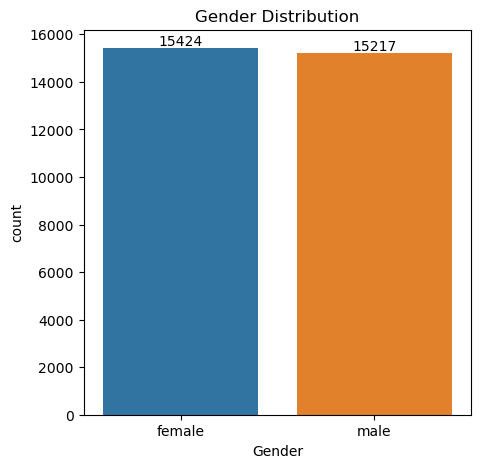

In [11]:
plt.figure(figsize = (5,5))
ax = sns.countplot(data = df, x= 'Gender')
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.show()

In [12]:
#From the above chart we have analysed that:
#The number of females in the data is more than the number of males.

In [13]:
gb = df.groupby('ParentEduc').agg({"MathScore":'mean',
                                  "ReadingScore":'mean',
                                  "WritingScore":'mean'})

In [14]:
gb

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


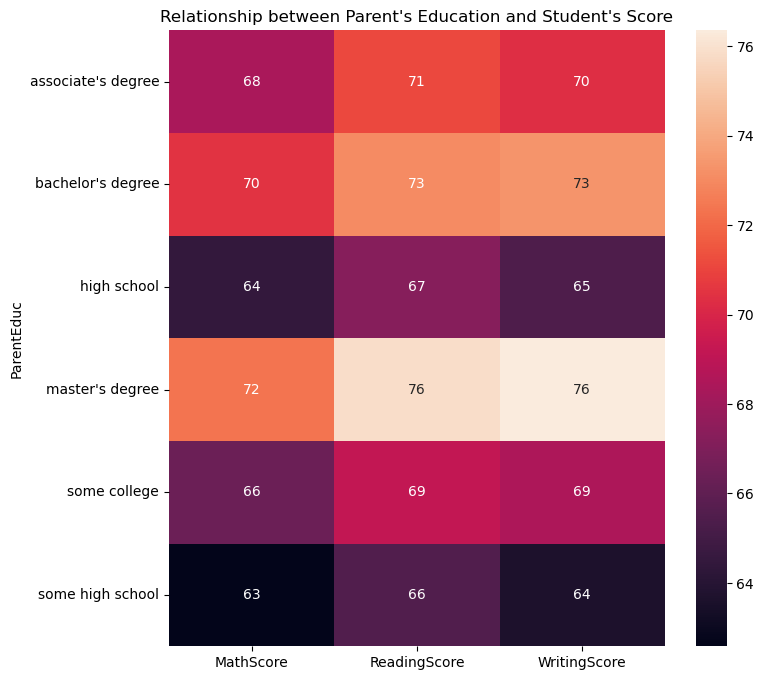

In [15]:
plt.figure(figsize= (8,8))
sns.heatmap(gb,annot=True)
plt.title("Relationship between Parent's Education and Student's Score")
plt.show()

In [16]:
#From the above chart we have concluded that the eduction 
#of the parents impact the scores

In [17]:
gb1 = df.groupby('ParentMaritalStatus').agg({"MathScore":'mean',
                                  "ReadingScore":'mean',
                                  "WritingScore":'mean'})
gb1

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


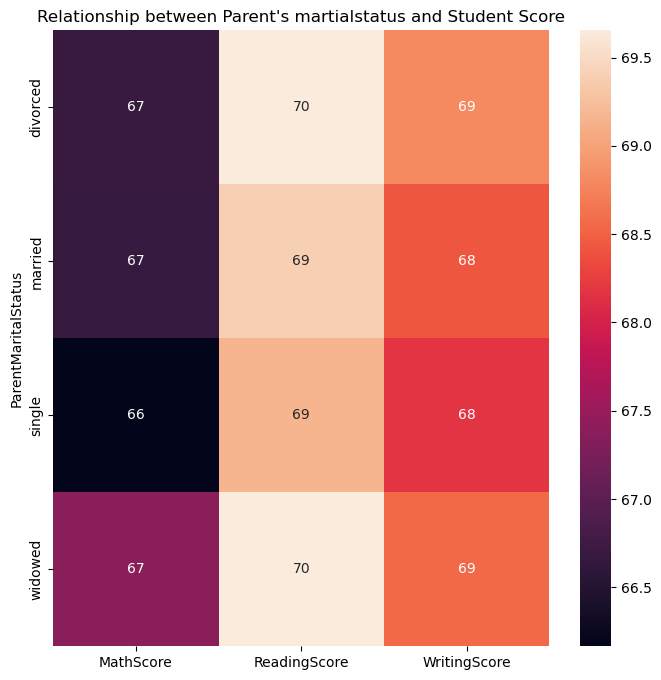

In [18]:
plt.figure(figsize= (8,8))
sns.heatmap(gb1,annot=True)
plt.title("Relationship between Parent's martialstatus and Student Score")
plt.show()

In [19]:
#From the above chart we have concluded that there is no/negligible
#impact on student score depending upon parents martial status

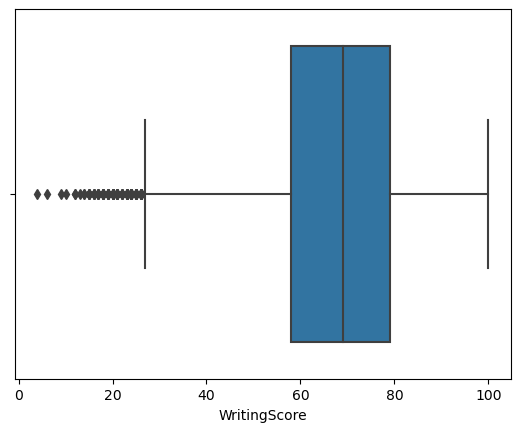

In [20]:
sns.boxplot(data = df, x='WritingScore')
plt.show()

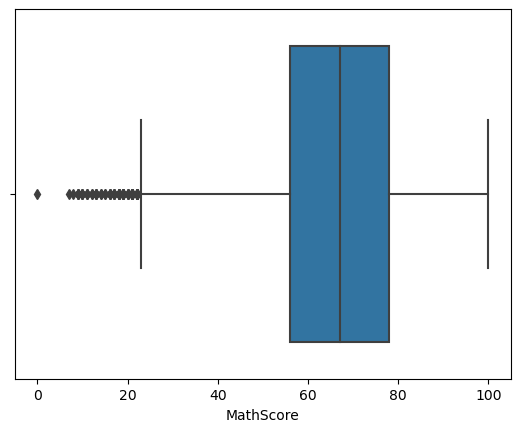

In [21]:
sns.boxplot(data = df, x='MathScore')
plt.show()

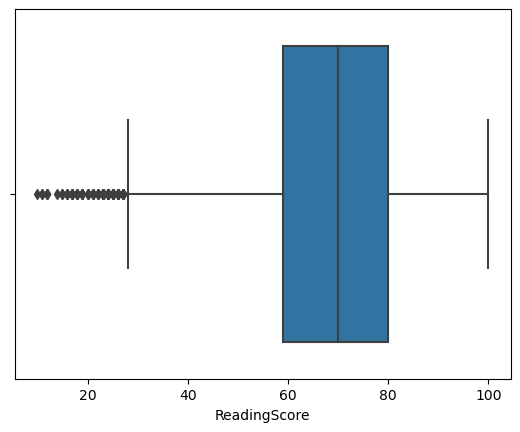

In [22]:
sns.boxplot(data = df, x='ReadingScore')
plt.show()

In [23]:
df['EthnicGroup'].value_counts()

group C    9212
group D    7503
group B    5826
group E    4041
group A    2219
Name: EthnicGroup, dtype: int64

In [24]:
print(df['EthnicGroup'].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


##### Distribution of Ethnic Group

In [25]:
GroupA = df.loc[(df['EthnicGroup'] == 'group A')].count()
GroupB = df.loc[(df['EthnicGroup'] == 'group B')].count()
GroupC = df.loc[(df['EthnicGroup'] == 'group C')].count()
GroupD = df.loc[(df['EthnicGroup'] == 'group D')].count()
GroupE = df.loc[(df['EthnicGroup'] == 'group E')].count()

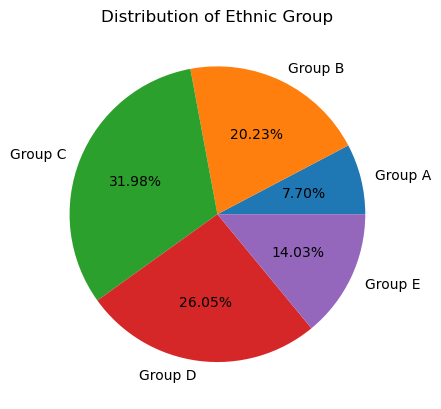

In [26]:
l = ["Group A","Group B","Group C","Group D","Group E"]
mylst = [GroupA['EthnicGroup'],GroupB['EthnicGroup'],GroupC['EthnicGroup'],GroupD['EthnicGroup'],GroupE['EthnicGroup']]
plt.pie(mylst, labels = l, autopct = "%1.2f%%")
plt.title("Distribution of Ethnic Group")
plt.show()

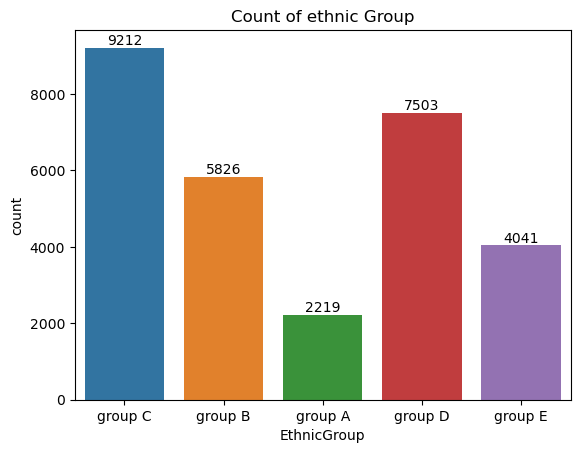

In [27]:
ax = sns.countplot(data = df, x= 'EthnicGroup')
ax.bar_label(ax.containers[0])
plt.title("Count of ethnic Group")
plt.show()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [41]:
df['IsFirstChild'].value_counts()

yes    19082
no     10655
Name: IsFirstChild, dtype: int64

##### 
Their are total 19082 student as first child of their parents

In [44]:
df['Total'] = df['MathScore'] + df['ReadingScore'] + df['WritingScore']

In [46]:
df['Total'] = df['Total'] / 3

In [48]:
df['Total'].max()

100.0

In [54]:
df.loc[df['Total'] == 100].shape

(47, 15)

#Their are in total 47 Students who scored 100 in all three subjects

In [57]:
df.loc[(df['Total']== 100) & (df['Gender'] == 'female')].shape

(25, 15)

In [58]:
#Out of which 25 students are females

In [59]:
df.loc[(df['Total']==100) & (df['Gender'] == 'male')].shape

(22, 15)

In [60]:
#22 are male students

In [63]:
df.loc[(df['Total'] >= 80) & (df['Total'] <= 100)].shape

(6861, 15)

In [64]:
#6861 students scored distinction marks

In [66]:
df.loc[(df['Total'] >= 80) & (df['Total'] <= 100), 'WklyStudyHours'].value_counts()

5 - 10    3768
< 5       1526
> 10      1356
Name: WklyStudyHours, dtype: int64

In [67]:
#Above we can obsere that the students who scored good marks usuall study for 5-10 hours weekly
#Some students studied for more than 10 hours
#And some of them studied for less than 5 hours still were able to score good marks

##### Lets see marks of students playing some kind sports 

In [71]:
df['PracticeSport'].value_counts()

sometimes    15213
regularly    10793
never         4004
Name: PracticeSport, dtype: int64

In [76]:
 df.loc[(df['PracticeSport']=='never') & (df['Total']>=80), ('Total','PracticeSport')]

,Total,PracticeSport
6,89.000000,never
111,84.000000,never
116,88.333333,never
152,83.666667,never
297,80.666667,never
...,...,...
30325,94.666667,never
30371,81.333333,never
30401,85.333333,never
30453,82.000000,never


In [77]:
df.loc[(df['PracticeSport']=='regularly') & (df['Total']>=80), ('Total','PracticeSport')]

,Total,PracticeSport
35,81.000000,regularly
37,86.000000,regularly
50,83.666667,regularly
70,81.333333,regularly
86,87.333333,regularly
...,...,...
30587,88.666667,regularly
30610,80.666667,regularly
30623,83.000000,regularly
30632,89.000000,regularly


In [78]:
#So students who use to play the sport regularly were also able to score good marks.

In [80]:
df.head(1).T

,0
Gender,female
EthnicGroup,NaN
ParentEduc,bachelor's degree
LunchType,standard
TestPrep,none
ParentMaritalStatus,married
PracticeSport,regularly
IsFirstChild,yes
NrSiblings,3.0
TransportMeans,school_bus
